Merge Data for Deeper Insights

✅ Pipeline + Accounts
- Do larger companies (high revenue/employees) close more deals?
- Which industries perform best?
- Action: Compare win rates by company size & industry.

DIVE INTO QUADRIC OR CUBIC FUNCTIONS FOR UNDERSTANDING BETTER CURVED OR COMPLEX RELATIONSHIPS?

	•	Quadratic = Simple curved relationships (one peak or valley).
	•	Cubic = More complex evolution (multiple peaks, valleys, and inflection points).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
data_path = '/Users/sayo/personal_projects/sales-ops-auto/data'

In [4]:
sales_pipeline = pd.read_csv(os.path.join(data_path, 'sales_pipeline.csv'))
accounts = pd.read_csv(os.path.join(data_path, 'accounts.csv'))

In [5]:
sales_pipeline.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [6]:
accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


Merging both tables from left on account & exploring basic info

In [7]:
merged_tables = pd.merge(sales_pipeline, accounts, how='left', on='account')

In [8]:
merged_tables.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001.0,718.62,2448.0,United States,NaN
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002.0,3178.24,4540.0,United States,NaN
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001.0,718.62,2448.0,United States,NaN
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982.0,792.46,1299.0,United States,NaN


In [9]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8300 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       6711 non-null   float64
 8   sector            7375 non-null   object 
 9   year_established  7375 non-null   float64
 10  revenue           7375 non-null   float64
 11  employees         7375 non-null   float64
 12  office_location   7375 non-null   object 
 13  subsidiary_of     1292 non-null   object 
dtypes: float64(4), object(10)
memory usage: 962.6+ KB


In [10]:
merged_tables['close_value'].value_counts()

close_value
0.0       2473
54.0        80
53.0        57
57.0        55
59.0        54
          ... 
5695.0       1
1216.0       1
4712.0       1
3908.0       1
1052.0       1
Name: count, Length: 2051, dtype: int64

In [11]:
merged_tables.describe()

,close_value,year_established,revenue,employees
count,6711.000000,7375.000000,7375.000000,7375.000000
mean,1490.915512,1995.483661,2467.515536,5701.213424
std,2320.670773,9.187126,2596.135671,6816.683924
min,0.000000,1979.000000,4.540000,9.000000
25%,0.000000,1988.000000,647.180000,1238.000000
50%,472.000000,1995.000000,1698.200000,3492.000000
75%,3225.000000,2002.000000,2952.730000,7523.000000
max,30288.000000,2017.000000,11698.030000,34288.000000


In [12]:
#checking for missing values
merged_tables.isnull().sum()

opportunity_id         0
sales_agent            0
product                0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
subsidiary_of       7508
dtype: int64

In [13]:
merged_tables['close_value'].describe()

count     6711.000000
mean      1490.915512
std       2320.670773
min          0.000000
25%          0.000000
50%        472.000000
75%       3225.000000
max      30288.000000
Name: close_value, dtype: float64

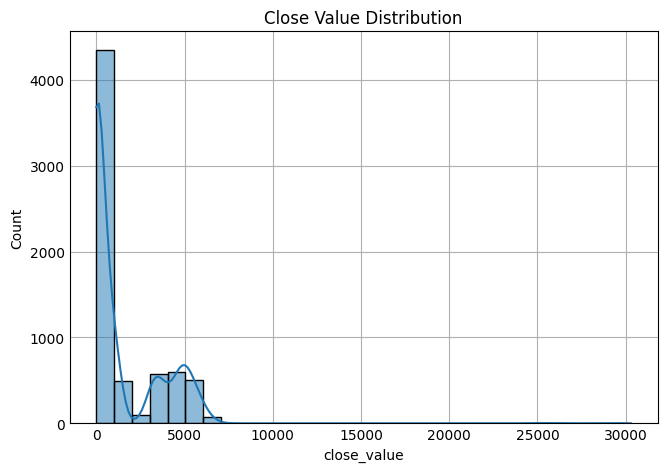

In [23]:
#Helps to see if sales are normally distributed or skewed

plt.figure(figsize=(6,4))
sns.histplot(merged_tables['close_value'], bins=30, kde=True)
plt.title('Close Value Distribution')
plt.show()

Histogram above shows a right-skewed (positively skewed) distribution of close values.

Takeways:
	
	1.	Majority of sales are small – There’s a high concentration of lower values close to zero.

	2.	A long right tail – A few sales are significantly higher, pulling the mean upwards.

	3.	Potential outliers – Some very large sales exist (above 10k), but they are rare.

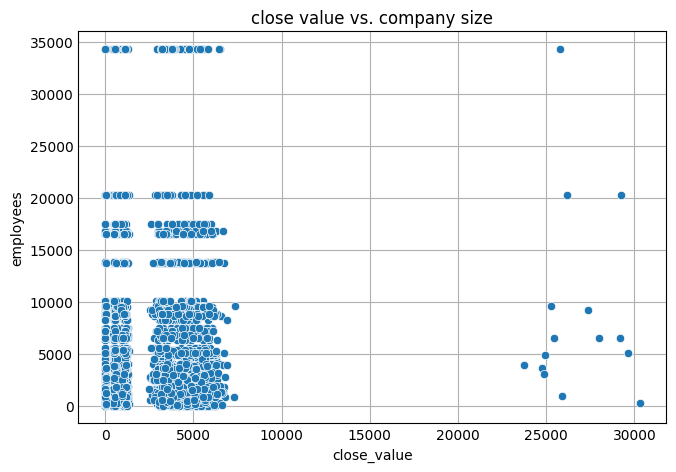

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='close_value', y='employees', data=merged_tables)
plt.title('close value vs. company size')
plt.show()

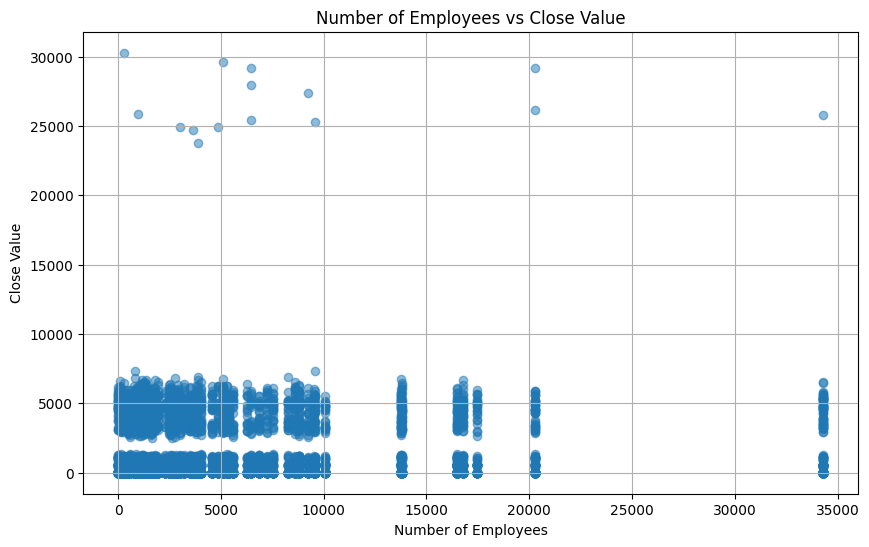

In [15]:
import matplotlib.pyplot as plt

# Assuming 'merged_tables' is a DataFrame and it has 'num_employees' and 'close_value' columns
plt.figure(figsize=(10, 6))
plt.scatter(merged_tables['employees'], merged_tables['close_value'], alpha=0.5)
plt.title('Number of Employees vs Close Value')
plt.xlabel('Number of Employees')
plt.ylabel('Close Value')
plt.grid(True)
plt.show()

above: we can see that companies between 0-10k are the ones that are most likely to have close values 

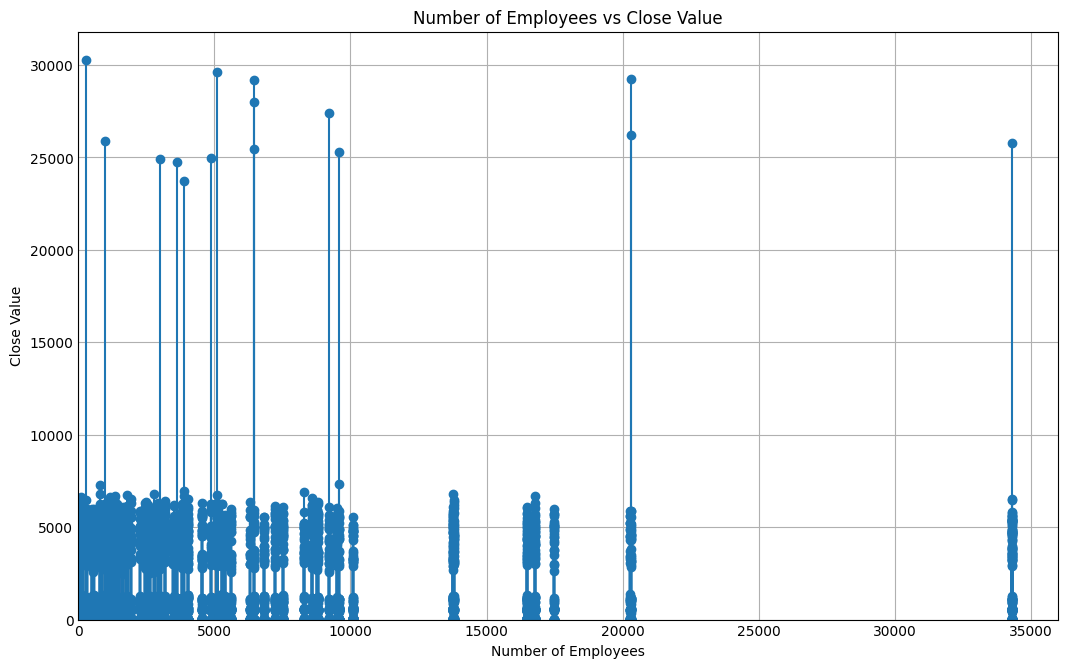

In [18]:
# Assuming 'merged_tables' is a DataFrame and it has 'num_employees' and 'close_value' columns
plt.style.use('_mpl-gallery')

# Extract data
x = merged_tables['employees']
y = merged_tables['close_value']

# Create stem plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, basefmt=" ")

ax.set_title('Number of Employees vs Close Value')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Close Value')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.grid(True)

plt.show()

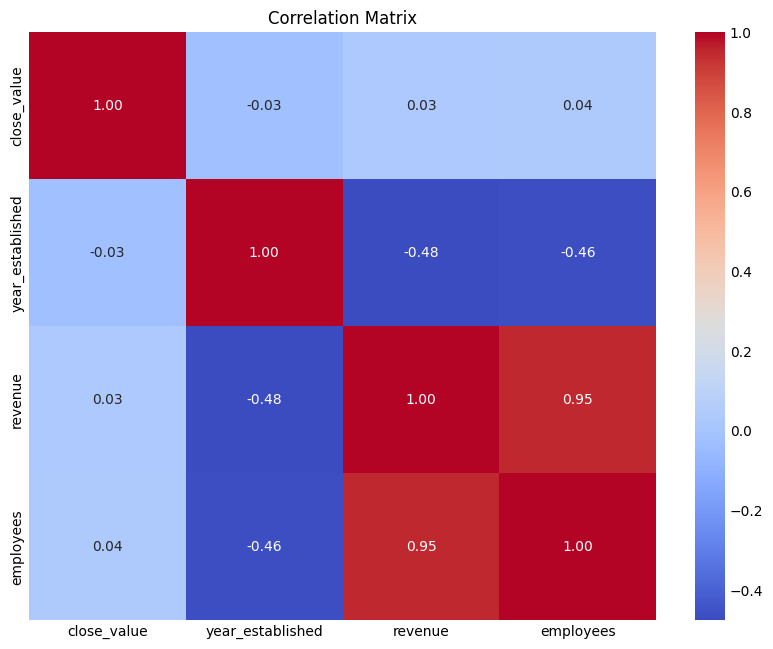

In [29]:
# Select only numeric columns
numeric_cols = merged_tables.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()